<a href="https://colab.research.google.com/github/ArindamBanerji/Time-Series/blob/master/misc/Scaffolding_ViT_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# setup the environment
! pip install yfinance numpy pandas matplotlib scikit-learn pyts torch einops vit-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [2]:
%matplotlib inline

In [3]:
# set some variables
root_dir = "/content/"
repo_git = "https://github.com/ArindamBanerji/Time-Series.git"
local_repo = "./Time-Series"

In [4]:
# go to the correct directory
import os
os.chdir(root_dir)

In [5]:
! (test -d $local_repo && git -C $local_repo pull --rebase) || git clone $repo_git

Cloning into 'Time-Series'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 29 (delta 3), reused 27 (delta 1), pack-reused 0
Receiving objects: 100% (29/29), 17.60 KiB | 17.60 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [6]:
# VARS: Set these variables
version_number = 'v32'
base_dir = "/content/Time-Series/ViT-TS-Forecast/"
fnm = "vision_transformer_ts_forecasting.py"
cur_fnm = fnm
default_batch_sz = 32
parse_args = True
fnm

'vision_transformer_ts_forecasting.py'

In [7]:
import os

cwd = os.getcwd()
if (os.path.samefile(cwd, base_dir) == False) :
    os.chdir(base_dir)

In [8]:
! (test -f "$fnm" && echo "file-exists") || echo "file-not-exists"

file-exists


In [9]:
# Option #2: dynamic import and call the main entry point.- do arg parse
import sys
import os
import importlib
import traceback  # Import traceback for error handling
import argparse  # Import argparse for command-line argument parsing

def invoke_ViT_TS_args (default_batch_sz, base_dir, fnm, version_num) :

    print ("batch_sz", default_batch_sz)

    # ... (rest of your code)
    file_exists = os.path.exists(os.path.join(base_dir, fnm ))

    if not file_exists:
        print(f"Error: File 'vision_transformer_ts_forecasting.py' not found in {base_dir}")
    else:
        # Append the directory to Python's search path
        sys.path.append(base_dir)

        module_name = fnm.replace('.py', '')

        # Attempt to import the module directly (no relative import)
        try:
            module = importlib.import_module(module_name)

            # Define command-line arguments
            parser = argparse.ArgumentParser()
            parser.add_argument('--ticker', type=str, required=True, help='Stock ticker symbol')
            parser.add_argument('--start_date', type=str, required=True, help='Start date for data')
            parser.add_argument('--end_date', type=str, required=True, help='End date for data')
            args = parser.parse_args(['--ticker', 'AAPL', '--start_date', '2020-01-01', '--end_date', '2023-12-31'])

            module.main(batch_size=32, version_num=version_number, args=args)

        except SystemExit as e:
            print(f"The 'main' function exited with code: {e.code}")
            # Print the traceback to see what led to the SystemExit
            traceback.print_exc()

batch_sz 32
Fetching stock data for AAPL...


[*********************100%%**********************]  1 of 1 completed


Preparing data...
Training model and making predictions...


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Fold 1, Epoch [10/300], Train Loss: 0.1286, Val Loss: 0.1336
Fold 1, Epoch [20/300], Train Loss: 0.1264, Val Loss: 0.1260
Fold 1, Epoch [30/300], Train Loss: 0.1120, Val Loss: 0.1192
Fold 1, Epoch [40/300], Train Loss: 0.0993, Val Loss: 0.1094
Fold 1, Epoch [50/300], Train Loss: 0.0706, Val Loss: 0.1017
Fold 1, Epoch [60/300], Train Loss: 0.0594, Val Loss: 0.0743
Fold 1, Epoch [70/300], Train Loss: 0.0465, Val Loss: 0.0590
Fold 1, Epoch [80/300], Train Loss: 0.0488, Val Loss: 0.0424
Fold 1, Epoch [90/300], Train Loss: 0.0375, Val Loss: 0.0423
Fold 1, Epoch [100/300], Train Loss: 0.0392, Val Loss: 0.0421
Fold 1, Epoch [110/300], Train Loss: 0.0312, Val Loss: 0.0383
Early stopping at epoch 112
Fold 2, Epoch [10/300], Train Loss: 0.1218, Val Loss: 0.1281
Fold 2, Epoch [20/300], Train Loss: 0.1104, Val Loss: 0.1091
Fold 2, Epoch [30/300], Train Loss: 0.0600, Val Loss: 0.0551
Fold 2, Epoch [40/300], Train Loss: 0.0485, Val Loss: 0.0417
Fold 2, Epoch [50/300], Train Loss: 0.0574, Val Loss: 0

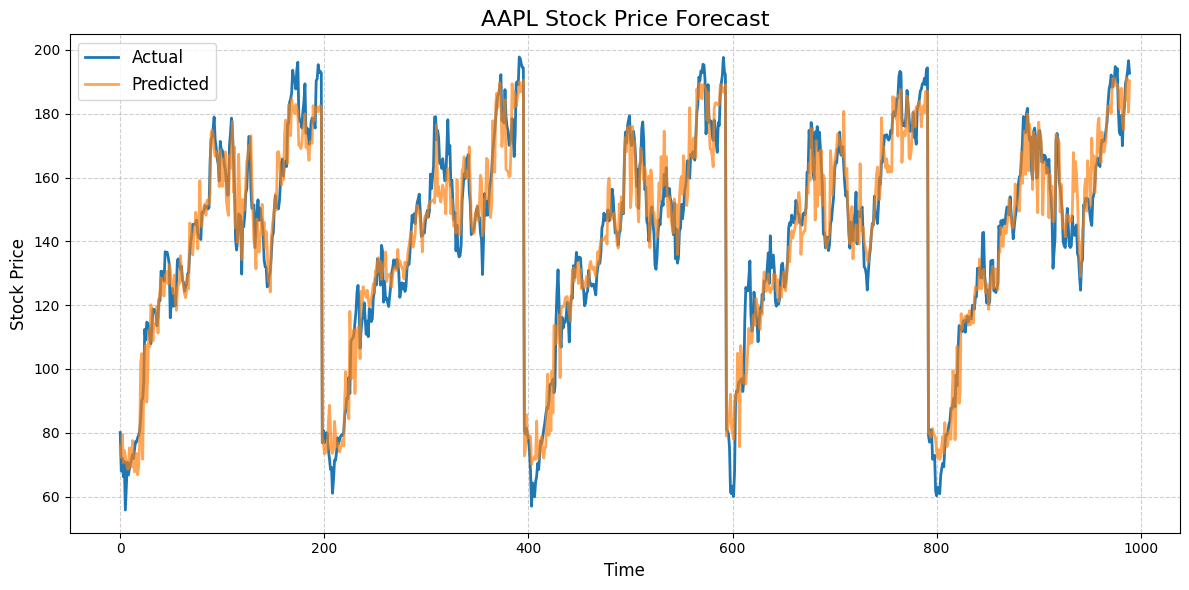

Metrics saved to 'metrics/v32_AAPL_2020-01-01_2023-12-31_metrics.csv'
Generating summary...

Stock Price Forecast Summary for AAPL
Version: v32
Period: 2020-01-01 to 2023-12-31

Evaluation Metrics:
MSE:  68.4845
RMSE: 8.2755
MAE:  6.4538
R2:   0.9354
MAPE: 5.0010%

Key Insights:
- Model explains 93.54% of the variance in stock price.
- Average prediction error: $8.28 (RMSE)
- Predictions are off by an average of 5.00% (MAPE)

Note: Please refer to the generated plot and metrics file for more details.

Summary saved as 'summaries/v32_AAPL_2020-01-01_2023-12-31_summary.txt'
Forecast complete. Results, metrics, and summary saved.


In [10]:
if parse_args :
      invoke_ViT_TS_args (default_batch_sz, base_dir, fnm, version_number)
